##ML Classification Example on the Wisconsin Breast Cancer dataset
###Dr. Trung T. Nguyen

This Python code demonstrates building classification models on the Iris dataset. In this example, we use the Wisconsin Breast Cancer (Diagnostic) dataset developed by Dr. Wolberg et al. at University of Wisconsin in 1992. The details of the dataset is here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [1]:
#First download the dataset in CSV format
!wget https://cs.winona.edu/Nguyen/sp22/CS445/labs/lab07_ml_classification/wibc_data.csv

--2023-11-21 22:27:11--  https://cs.winona.edu/Nguyen/sp22/CS445/labs/lab07_ml_classification/wibc_data.csv
Resolving cs.winona.edu (cs.winona.edu)... 199.17.161.24
Connecting to cs.winona.edu (cs.winona.edu)|199.17.161.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [application/octet-stream]
Saving to: ‘wibc_data.csv’

wibc_data.csv       100%[===================>] 122.27K   524KB/s    in 0.2s    

2023-11-21 22:27:12 (524 KB/s) - ‘wibc_data.csv’ saved [125204/125204]



In [2]:
# load required Python packages
# in case pandas is not installed - you can install it with this command using Anaconda Command Prompt or Navigator
#       pip install pandas
# Need to restart the notebook to take effect
import pandas as pd
import numpy as np

# Load WIBC data from csv file and display first five rows for sampling
data = pd.read_csv('wibc_data.csv')
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# We are dropping columns – ‘id’ and ‘Unnamed: 32’ as they have no role in prediction
data=data.drop(['Unnamed: 32', 'id'], axis = 1)
print('Current data shape:', data.shape)

Current data shape: (569, 31)


In [4]:
# How many classes of target col 'diagnosis'
data['diagnosis'].unique()
# cound how many sample data in this dataset for each category
data.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [5]:
# for dataset spliting
from sklearn.model_selection import train_test_split

# before training, we split into training and testing dataset with the ratio of 0.33
# there are 30 features and 2 classes output labels
X = np.array(data.iloc[:, 1:])
y = np.array(data['diagnosis'])
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.33)


*********** Decision Tree ********
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.95      0.96       120
           M       0.92      0.96      0.94        68

    accuracy                           0.95       188
   macro avg       0.94      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188

Confusion Matrix:
 [[114   6]
 [  3  65]]


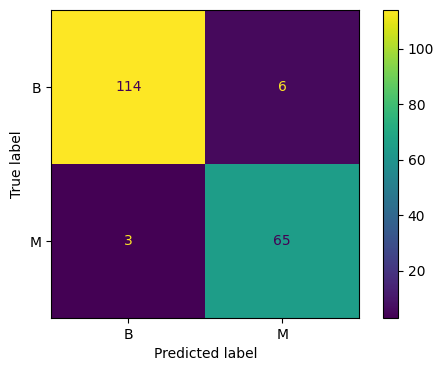

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 4]

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
# train such a model on the train dataset
dt_model = DecisionTreeClassifier(random_state = 0)
dt_model = dt_model.fit(xtrain, ytrain)
# prediction on test dataset
ypredict = dt_model.predict(xtest)
#print(ypredict)
# measure the performance - accuracy, confusion matrix, precision, recall, F1 score, and support
acc = accuracy_score(ytest, ypredict)
classreport = classification_report(ytest, ypredict)
confMat = confusion_matrix(ytest, ypredict)

print('\n*********** Decision Tree ********')
print('Accuracy: {:.2f}'.format(acc))
print('Classification Report:\n {}'.format(classreport))
print('Confusion Matrix:\n {}'.format(confMat))
ConfusionMatrixDisplay.from_estimator(dt_model, xtest, ytest)

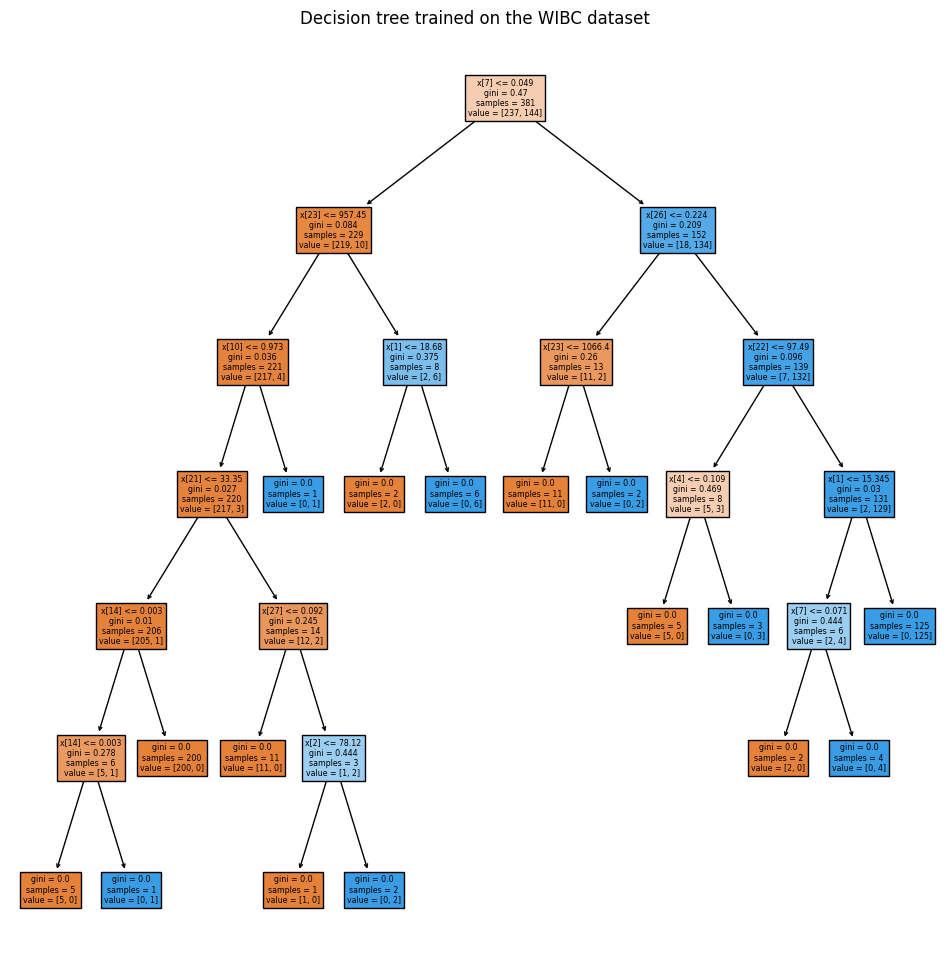

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.figure()
plot_tree(dt_model, filled=True)
plt.title("Decision tree trained on the WIBC dataset")
plt.show()